# Understanding Overfitting and Underfitting

One of the most important step in evaluating a machine learning model is to undersand whether the model overfits or underfits the data. 

In [86]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# define the true function to approximate with polynomial regression
def true_fun(x):
    return np.cos(x*np.pi/2) + np.sin(x*np.pi/2)
    
M = 1
n_samples = 50
X = np.sort(np.random.rand(n_samples))
X = 2*M*np.random.random(n_samples)-M
y = true_fun(X) + np.random.randn(n_samples) * 0.2


The aim is to try to fit a polynomial function of degree n to the data. n should be chosen as to not overfit or underfit the underlying data. This is often a trial-and-error process, using cross-validation and visualization to estimate the "best" fit to the trainig data.

The first step is to fit the data.

In [99]:
np.random.seed(0)

degrees = int(input("Please Enter The Degree of Polynomial Between 1-20:"))

polynomial_features = PolynomialFeatures(degree=degrees,
                                          include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)



Please Enter The Degree of Polynomial Between 1-20:3


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear_regression', LinearRegression())])

Then to evaluate the model using cross-validation and visualization.

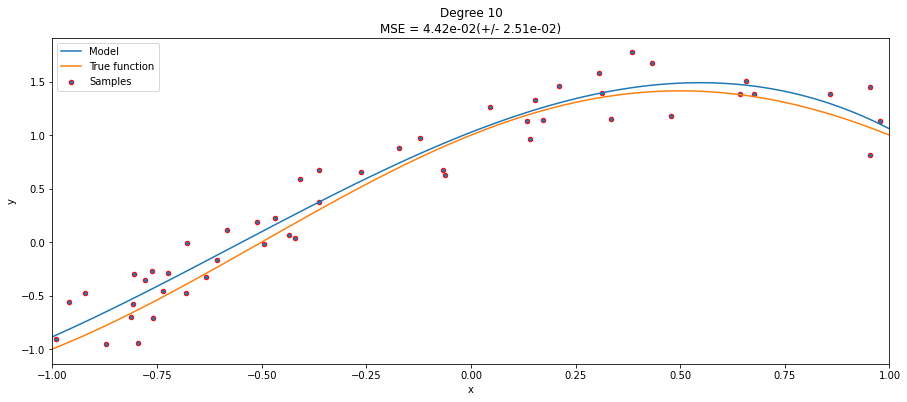

In [100]:
plt.figure(figsize=(15, 6))

scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                          scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(-M, M, 100)

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='r', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-M, M))
#plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    degree, -scores.mean(), scores.std()))
plt.show()

Degree: 1	MSE = 1.45e-01(+/- 1.28e-01)
Degree: 2	MSE = 5.48e-02(+/- 2.84e-02)
Degree: 3	MSE = 4.42e-02(+/- 2.51e-02)
Degree: 4	MSE = 4.44e-02(+/- 2.56e-02)
Degree: 5	MSE = 4.51e-02(+/- 2.47e-02)
Degree: 6	MSE = 4.69e-02(+/- 2.16e-02)
Degree: 7	MSE = 5.79e-02(+/- 2.64e-02)
Degree: 8	MSE = 5.43e-02(+/- 2.41e-02)
Degree: 9	MSE = 8.88e-02(+/- 1.03e-01)
Degree: 10	MSE = 3.06e-01(+/- 7.21e-01)


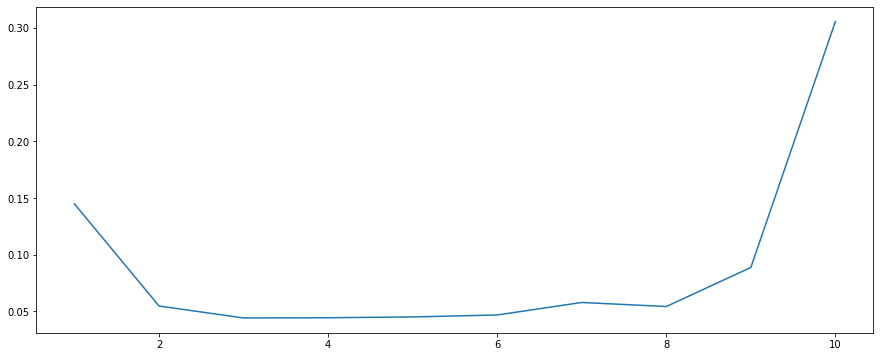

In [97]:
np.random.seed(0)

means = []
degrees = list(range(1,11))

for degree in degrees:

    polynomial_features = PolynomialFeatures(degree=degree,
                                          include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                              scoring="neg_mean_squared_error", cv=10)

    means.append(-scores.mean())
    print("Degree: {}\tMSE = {:.2e}(+/- {:.2e})".format(degree, -scores.mean(), scores.std()))


plt.figure(figsize=(15, 6))
plt.plot(degrees, means, label="Means")